# Loan Data from Prosper
## by Ali Shaker

## Investigation Overview

> What affects the borrower’s APR or interest rate?

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Exploring the Data

In [3]:
# the structure of data (number of columns and rows)
df.shape

(113937, 81)

### Check for columns names , data types and NULL values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### choose important variables to work on it because there are so many variables

In [5]:
columns = ['Term' , 
        'LoanStatus',   
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (Alpha)',                
        'ListingCategory (numeric)', 
        'EmploymentStatus', 
        'IsBorrowerHomeowner', 
        'StatedMonthlyIncome', 
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors' ,
        'MonthlyLoanPayment']

### create new data frame with the choosen columns and name it 'df2'

In [6]:
df2 = df[columns]

### check for null values in the 'df2'

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   StatedMonthlyIncome        113937 non-null  float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  PercentFunded              113937 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  Investors                  113937 non-null  int64  
 13  MonthlyLoanPayment         11

In [8]:
df2=df2.dropna()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       84853 non-null  int64  
 1   LoanStatus                 84853 non-null  object 
 2   BorrowerAPR                84853 non-null  float64
 3   BorrowerRate               84853 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   EmploymentStatus           84853 non-null  object 
 7   IsBorrowerHomeowner        84853 non-null  bool   
 8   StatedMonthlyIncome        84853 non-null  float64
 9   LoanOriginalAmount         84853 non-null  int64  
 10  PercentFunded              84853 non-null  float64
 11  IncomeRange                84853 non-null  object 
 12  Investors                  84853 non-null  int64  
 13  MonthlyLoanPayment         84853 non-null  fl

In [10]:
df2.rename(columns={ 'ProsperRating (Alpha)': 'Prosper_Rating_Alpha',
                        'ListingCategory (numeric)' : 'Listing_Category_Numeric'}, inplace=True)

In [11]:
df2.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'Prosper_Rating_Alpha', 'Listing_Category_Numeric', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'MonthlyLoanPayment'],
      dtype='object')

In [12]:
df2['Term'] = df2['Term'].astype('category')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      84853 non-null  category
 1   LoanStatus                84853 non-null  object  
 2   BorrowerAPR               84853 non-null  float64 
 3   BorrowerRate              84853 non-null  float64 
 4   Prosper_Rating_Alpha      84853 non-null  object  
 5   Listing_Category_Numeric  84853 non-null  int64   
 6   EmploymentStatus          84853 non-null  object  
 7   IsBorrowerHomeowner       84853 non-null  bool    
 8   StatedMonthlyIncome       84853 non-null  float64 
 9   LoanOriginalAmount        84853 non-null  int64   
 10  PercentFunded             84853 non-null  float64 
 11  IncomeRange               84853 non-null  object  
 12  Investors                 84853 non-null  int64   
 13  MonthlyLoanPayment        84853 non-null  flo

In [14]:
Numeric_df = df2.loc[:, (df2.dtypes == np.int64) | (df2.dtypes == np.float64) ]
categorical_df = df2.loc[:,  (df2.dtypes == 'category') | (df2.dtypes == 'object') ]

### What is the structure of your dataset?

> there are 81 variables (columns) and 113937 rows but after choosing 

### What is/are the main feature(s) of interest in your dataset?

> feature that affect the loan’s outcome status and that affect the borrower’s APR
or interest rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think the IncomeRange will affect on the borrower’s APR or interest rate


## Univariate Exploration



## We will start by the categorical variables analysis

### Let's look at the ranges of the income for all the borrowers

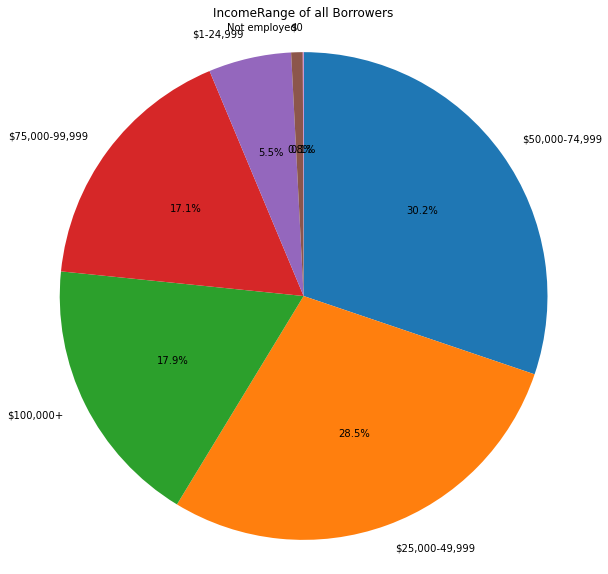

In [15]:
plt.figure(figsize = [20, 10])
sorted_counts = df2['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

#### Most Borrowers have an income range 50000 - 74999 USD

### let's look at the Term counts

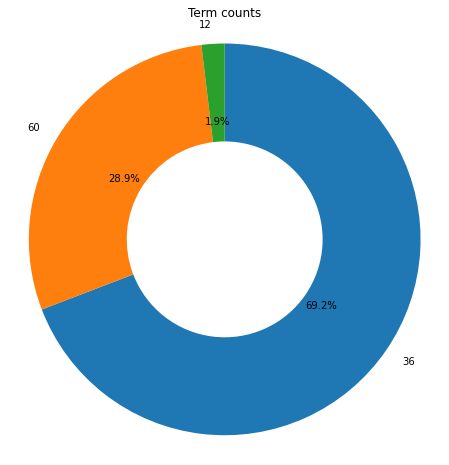

In [16]:
plt.figure(figsize = [15, 8])
NDF = df2['Term'].value_counts()
plt.pie(NDF, labels = NDF.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5}, autopct   = '%.1f%%');
plt.title("Term counts")
plt.axis('square');

#### most of borrwers take the loan with term 36 monthes and the least of them take it with term 12 monthes

## The Insights of categorical variables analysis :

> Most Borrowers have an income range 50000 - 74999 USD

> most of borrwers take the loan with term 36 monthes and the least of them take it with term 12 monthes

## Now we will start to Analyze the numeric attributes

### Let's look at the Borrower's Annual Percentage Rate (APR) for the loan.

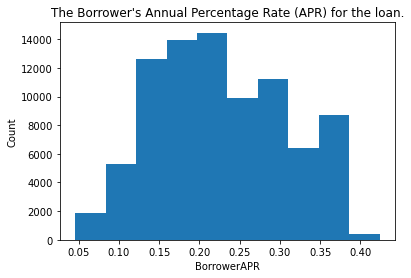

In [17]:
plt.hist(data = df2, x = 'BorrowerAPR');
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');
plt.title("The Borrower's Annual Percentage Rate (APR) for the loan.");

#### There are many APR from 4% to 46% but the most of them are about 20%

### Let's look at the Loan Original Amount of all Borrowers

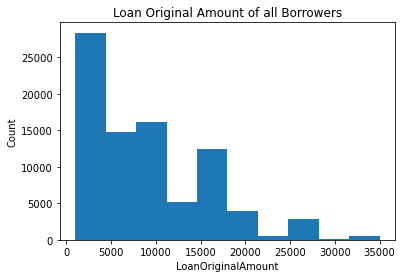

In [18]:
plt.hist(data = df2, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers");

the histgram is right skewed

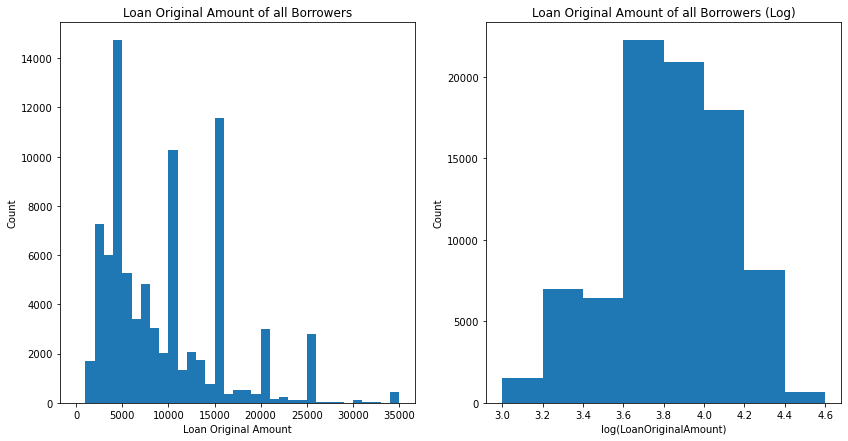

In [19]:
plt.figure(figsize = [14, 7])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df2.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data =df2, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df2.LoanOriginalAmount)
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers (Log)");

df2.LoanOriginalAmount_log = np.log10(df2.LoanOriginalAmount)

#### Loan Original Amount started from 1000 to 35000 and there are multiple peaks observed at 4000 , 10000  and 15000 $.


### Let's look at the monthly loan payment for all borrowers

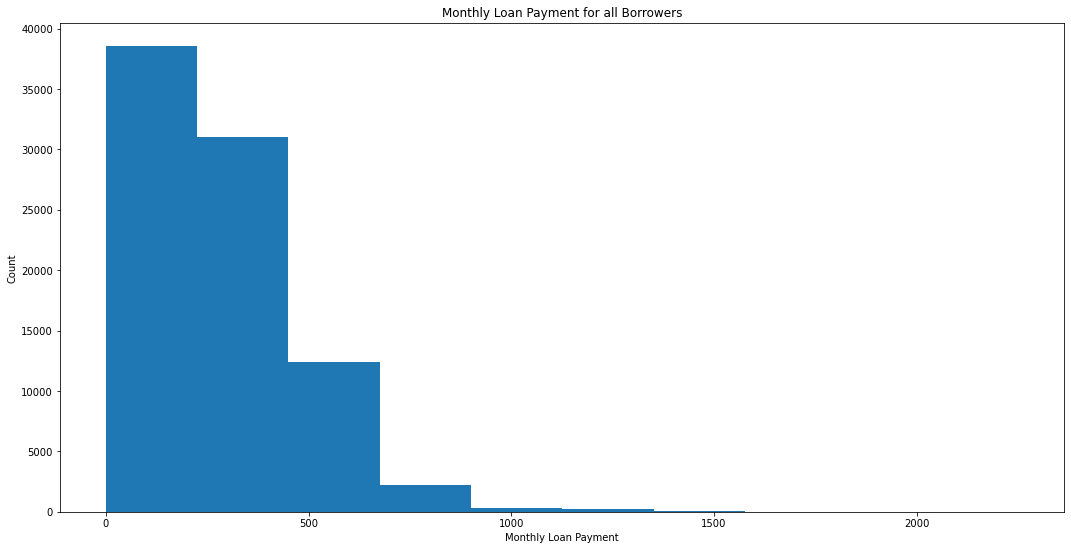

In [20]:
plt.figure(figsize = [18, 9])
plt.hist(data = df2, x = 'MonthlyLoanPayment');
plt.xlabel('Monthly Loan Payment');
plt.ylabel('Count');
plt.title("Monthly Loan Payment for all Borrowers");

#### Most of borrowers pay less than 500 USD monthly for the loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i need to make transformations for the variables (Investors , LoanOriginalAmount)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> changed the columns names that contain a white space to can work on them

> changed the data type of the Term variable to be category instead of int64

> drop all rows that contain NULL values

## The Insights of Numerical variables analysis :

> There are many APR from 4% to 46% but the most of them are about 20%

> Loan Original Amount started from 1000 to 35000 and there are multiple peaks observed at 4000 , 10000 and 15000 USD

> Most of borrowers pay less than 500 USD monthly for the loan

## Bivariate Exploration

## Categorical Vs Numeric

### Check if the IncomeRange will affect on the borrower’s APR or not


Text(0.5, 1.0, 'Income Range vs BorrowerAPR')

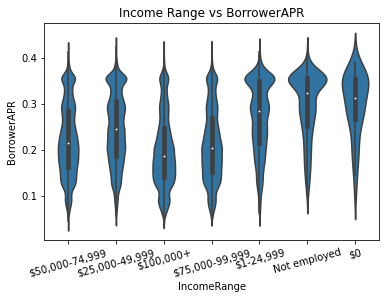

In [21]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df2, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs BorrowerAPR')

#### The beggist APR is for those whose income range from 1 - 24999 USD and the lowest APR is for those whose income range more than 100000 USD (The Lower income range the more APR) (The more income range the lower APR)

## Numeric Vs Numeric

### Check if the LoanOriginalAmount will affect on the borrower’s APR or not

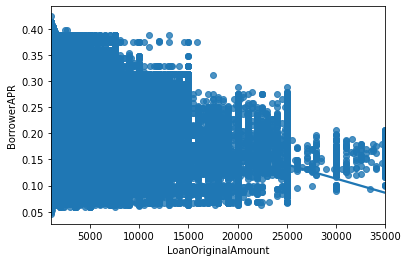

In [22]:
sb.regplot(data = df2, x = 'LoanOriginalAmount', y = 'BorrowerAPR')

#### There is a correlation between the LoanOriginalAmount and the BorrowerAPR that the more LoanOriginalAmount the less of BorrowerAPR

### Check if the MonthlyLoanPayment will affect on the borrower’s APR or not

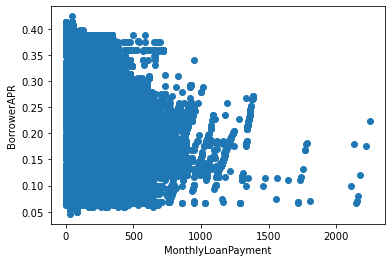

In [23]:
plt.scatter(data = df2, x = 'MonthlyLoanPayment', y = 'BorrowerAPR')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('BorrowerAPR');

#### There is a correlation between the MonthlyLoanPayment and the BorrowerAPR that the less MonthlyLoanPayment the more of BorrowerAPR

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a correlation between the (MonthlyLoanPayment , LoanOriginalAmount , IncomeRange) and the BorrowerAPR

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## The Insights of Bivariate Exploration :

> The beggist APR is for those whose income range from 1 - 24999 USD and the lowest APR is for those whose income range more than 100000 USD (The Lower income range the more APR) (The more income range the lower APR)

> There is a correlation between the LoanOriginalAmount and the BorrowerAPR that the more LoanOriginalAmount the less of BorrowerAPR

> There is a correlation between the MonthlyLoanPayment and the BorrowerAPR that the less MonthlyLoanPayment the more of BorrowerAPR

## Multivariate Exploration

### Check if the Term affect on the IncomeRange and BorrowerAPR

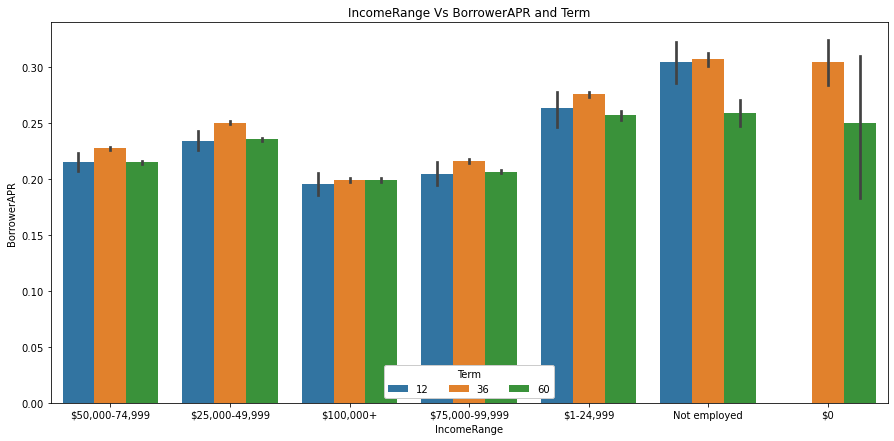

In [24]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = df2, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.title('IncomeRange Vs BorrowerAPR and Term');

#### The term (36 monthes) have a biggest APR for all of borrowers who have an income range less than 100000 $

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The term (36 monthes) have a biggest APR for all of borrowers who have an income range less than 100000 USD

